## KMeans Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [3]:
X

array([[ 5.74253391, -2.89534571],
       [-2.49600898,  3.38651459],
       [-1.86218653,  3.22930869],
       ...,
       [-3.37546217,  3.99203662],
       [-1.97333154,  1.66606641],
       [-2.6167414 , -1.39760471]])

In [4]:
y

array([1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2,
       1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2,

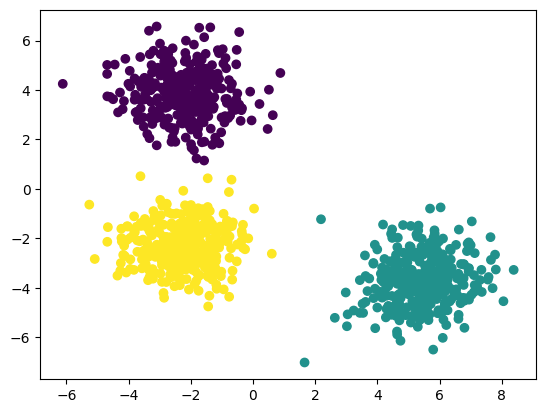

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
## Standardizaton
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

In [14]:
## KMeans
from sklearn.cluster import KMeans

In [15]:
## Elbow method to select the K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/

In [16]:
wcss

[1600.0000000000005,
 561.9556508632276,
 123.73265822328244,
 107.982456427946,
 92.86348436485167,
 79.77270741293233,
 70.30525194078658,
 61.93640815564734,
 54.96076425271319,
 50.12558418431286]

Text(0, 0.5, 'WCSS')

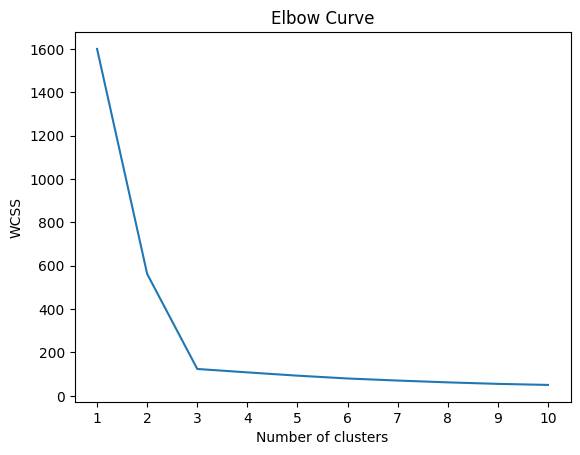

In [18]:
## Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [20]:
kmeans.fit_predict(X_train_scaled)

/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1,
       2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1,

In [21]:
y_pred = kmeans.predict(X_test_scaled)

In [22]:
y_pred

array([2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0,
       1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       2, 0], dtype=int32)

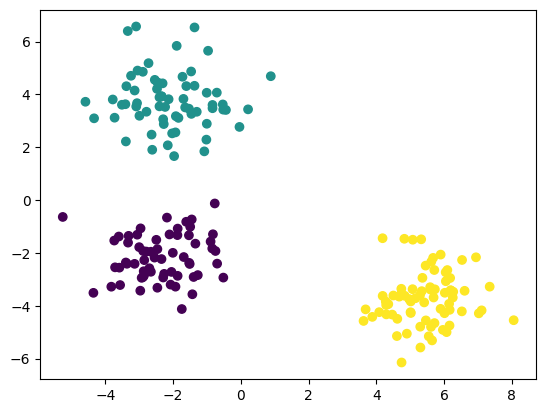

In [23]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

### Validating the K value
#### 1. Knee Locator
#### 2. Silhouette Score

In [24]:
%pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
## Knee Locator
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [27]:
kl.elbow

3

In [28]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coeffs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train_scaled)
    kmeans.predict(X_train_scaled)
    silhouette_coeffs.append(silhouette_score(X_train_scaled, kmeans.labels_))

/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhruvsmac/Desktop/development/

In [30]:
silhouette_coeffs

[0.6185058374755033,
 0.7361034940693548,
 0.5924615867203531,
 0.451009036285873,
 0.3263349386277055,
 0.3387442300111928,
 0.33765278640775437,
 0.34234314357979984,
 0.3467507049165961]

Text(0, 0.5, 'Silhouette Score')

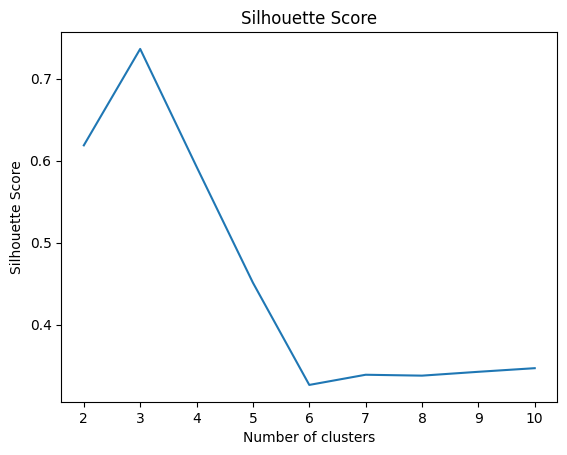

In [33]:
plt.plot(range(2, 11), silhouette_coeffs)
plt.title('Silhouette Score')
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')